In [1]:
import ktrain
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


2.13.0


In [2]:
from ktrain import text

In [9]:
merged_aspirational_df = pd.read_excel("/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/src/data_preprocessing/prepare_sentence_level/aspirational_plus_batch_1_batch_2_merged.xlsx")
merged_aspirational_df.drop(columns="label.1", inplace=True)
merged_aspirational_df

,sentence,label,phrase,batch,changed?
0,why am i here?,0,"[""ever since i was little i wanted to be a doc...",batch_1,False
1,well why does anyone pursue a higher education?,0,"[""ever since i was little i wanted to be a doc...",batch_1,False
2,to better one self and be able to succeed late...,1,"[""ever since i was little i wanted to be a doc...",batch_1,False
3,ever since i was little i wanted to be a docto...,1,"[""ever since i was little i wanted to be a doc...",batch_1,False
4,i always wanted to be able to help people and ...,1,"[""ever since i was little i wanted to be a doc...",batch_1,False
...,...,...,...,...,...
8715,"anyways, the path im referring to is basically...",0,['one of these goals is being in a career i en...,batch_2,False
8716,i know that i want a career in which ill help ...,0,['one of these goals is being in a career i en...,batch_2,False
8717,"in any case, i intend to keep moving forward i...",0,['one of these goals is being in a career i en...,batch_2,False
8718,i am here to fulfill a covenant with myself an...,1,['i am here to fulfill a covenant with myself ...,batch_2,False


In [10]:
training_df, test_df = train_test_split(merged_aspirational_df, test_size=0.1, random_state=18, stratify=merged_aspirational_df['label'])

In [12]:
training_df.shape

(7848, 5)

In [13]:
training_df

,sentence,label,phrase,batch,changed?
7469,another reasons that i am here in school becau...,1,['the reason that i am here in school and in c...,batch_2,False
7718,i chose this career because i have always want...,1,"['in a general sense, i am here at school beca...",batch_2,False
3135,i feel hopeful in my tiny place.,0,['this class will help me better understand th...,batch_1,False
3167,taking this class will help me finish my ba wh...,1,['taking this class will help me finish my ba ...,batch_1,False
124,"not in the literal sense of ""why am in this cl...",1,"[""if i'm in sci then i'll probably get a good ...",batch_1,False
...,...,...,...,...,...
5670,this class is my extra effort in trying to be ...,0,['i am in sci 230 because i want to get ahead ...,batch_2,False
7059,another bonus about the job is that hopefully ...,1,['i am pursuing a career in the stem field due...,batch_2,False
7431,i hope to pursue a masters degree to increase ...,1,['i hope to pursue a masters degree to increas...,batch_2,False
4688,i also get to ask any of the questions i might...,0,['i am here because i want to learn and unders...,batch_2,False


In [14]:
test_df.shape

(872, 5)

In [16]:
# Print dataset shapes
print(f"Training dataset shape: {training_df.shape} \nTest dataset shape: {test_df.shape}")

# Count positive labels
pos_train = training_df['label'].sum()
pos_test = test_df['label'].sum()

# Print positive label distributions
print("-" * 50)
print(f"Positive labels in training dataset: {pos_train} out of {len(training_df)} ({(pos_train / len(training_df)) * 100:.2f}%)")
print(f"Positive labels in test dataset: {pos_test} out of {len(test_df)} ({(pos_test / len(test_df)) * 100:.2f}%)")
print("-" * 50)

Training dataset shape: (7848, 5) 
Test dataset shape: (872, 5)
--------------------------------------------------
Positive labels in training dataset: 1854 out of 7848 (23.62%)
Positive labels in test dataset: 206 out of 872 (23.62%)
--------------------------------------------------


In [17]:
def rename_and_encode(df):
    # Rename the 'sentences' column to 'sentence'
    df = df.rename(columns={'sentences': 'sentence'})
    
    # Check if 'labels' column already contains 0 and 1 values
    unique_values = df['label'].unique()
    
    if set(unique_values) == {0, 1}:
        # If the unique values are 0 and 1, no encoding is needed
        return df
    else:
        # Otherwise, map 'Yes' to 1 and 'No' to 0 in the 'labels' column
        df['label'] = df['label'].map({'Yes': 1, 'No': 0})
    
    return df

In [18]:
MAXLEN = 150

In [19]:
X = training_df['sentence']
y = training_df['label']

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 18, stratify=y)

In [21]:
X_train

8090    i met him while we were both enlisted in the u...
4599    i am here because i want to further advance my...
4388    i am a mechanical engineering major due to my ...
495     i am taking sci 111 because it is a lower divi...
548     so, im here to complete school and walk across...
                              ...                        
527     i enjoy it because it is forced studying in a ...
7915    im not that interested in physics but so far f...
1549     why im here i am here because of my career goal.
7080    i am here because i am attempting to become a ...
5797    i am here because i want to be here as i creat...
Name: sentence, Length: 7063, dtype: object

In [22]:
X_test

743     i wished that i was more interested in the mat...
4565    also, keep this program going because its real...
1858    i also think that its pretty cool to learn how...
6414    i"m at sfsu because i love the opportunities t...
8391           and i want to learn more now, so i'm here.
                              ...                        
6141    ever since i was a child i loved going on top ...
5248    i am here because i failed two physics classes...
5312    these are classes that i need for my major and...
3993    i also think that learning physics could help ...
8448    im here at sfsu as a transfer student to get m...
Name: sentence, Length: 785, dtype: object

In [32]:
model_name = 'distilbert-base-uncased'

In [33]:
distillbert_transformer = text.Transformer(model_name, maxlen=MAXLEN, class_names=[0,1])
training_set = distillbert_transformer.preprocess_train(X_train.tolist(), y_train.tolist())
validation_set = distillbert_transformer.preprocess_test(X_test.tolist(), y_test.tolist())
distillbert_base_model = distillbert_transformer.get_classifier()

preprocessing train...
language: en
train sequence lengths:
	mean : 21
	95percentile : 40
	99percentile : 56


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 21
	95percentile : 38
	99percentile : 58


In [34]:
distillbert_learner = ktrain.get_learner(distillbert_base_model, train_data=training_set, val_data=validation_set, batch_size=6)

Three possible suggestions for LR from plot:
	Longest valley (red): 4.85E-06
	Min numerical gradient (purple): 5.45E-07
	Min loss divided by 10 (omitted from plot): 6.17E-06

![](2023-11-07-23-09-21.png)

In [35]:
# distillbert_learner.set_weight_decay(0.001)

In [36]:
# distillbert_learner.autofit(2.1726595218244106e-05, epochs=6)

# distillbert_learner.autofit(2e-5, early_stopping=3)
distillbert_learner.autofit(2e-5, epochs=5)



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/5
1178/1178 [==============================] - 204s 167ms/step - loss: 0.3730 - accuracy: 0.8345 - val_loss: 0.2851 - val_accuracy: 0.8815
Epoch 2/5
1178/1178 [==============================] - 191s 161ms/step - loss: 0.2587 - accuracy: 0.8976 - val_loss: 0.2689 - val_accuracy: 0.8955
Epoch 3/5
1178/1178 [==============================] - 192s 162ms/step - loss: 0.2027 - accuracy: 0.9269 - val_loss: 0.2759 - val_accuracy: 0.8866
Epoch 4/5
1178/1178 [==============================] - 195s 165ms/step - loss: 0.1548 - accuracy: 0.9485 - val_loss: 0.3170 - val_accuracy: 0.8841
Epoch 5/5
1178/1178 [==============================] - 195s 165ms/step - loss: 0.1103 - accuracy: 0.9640 - val_loss: 0.3251 - val_accuracy: 0.8866


In [37]:
for key,_ in distillbert_learner.history.history.items():
    print(key)

loss
accuracy
val_loss
val_accuracy
lr
iterations
momentum


In [38]:
distillbert_learner.history.history.items()

dict_items([('loss', [0.3730292022228241, 0.25867533683776855, 0.20271576941013336, 0.15480740368366241, 0.1102801263332367]), ('accuracy', [0.8344895839691162, 0.8976355791091919, 0.9269432425498962, 0.9484637975692749, 0.9640379548072815]), ('val_loss', [0.28505218029022217, 0.2689433693885803, 0.27590951323509216, 0.31699734926223755, 0.3251458704471588]), ('val_accuracy', [0.8815286755561829, 0.8955414295196533, 0.8866242170333862, 0.8840764164924622, 0.8866242170333862]), ('lr', [2e-06, 2.0305604e-06, 2.0611205e-06, 2.091681e-06, 2.122241e-06, 2.1528015e-06, 2.1833616e-06, 2.2139218e-06, 2.2444822e-06, 2.2750423e-06, 2.3056027e-06, 2.3361629e-06, 2.3667233e-06, 2.3972834e-06, 2.4278438e-06, 2.458404e-06, 2.4889644e-06, 2.5195245e-06, 2.550085e-06, 2.580645e-06, 2.6112054e-06, 2.6417656e-06, 2.672326e-06, 2.7028861e-06, 2.7334465e-06, 2.7640067e-06, 2.794567e-06, 2.8251272e-06, 2.8556876e-06, 2.8862478e-06, 2.9168082e-06, 2.9473683e-06, 2.9779287e-06, 3.0084889e-06, 3.0390493e-06, 

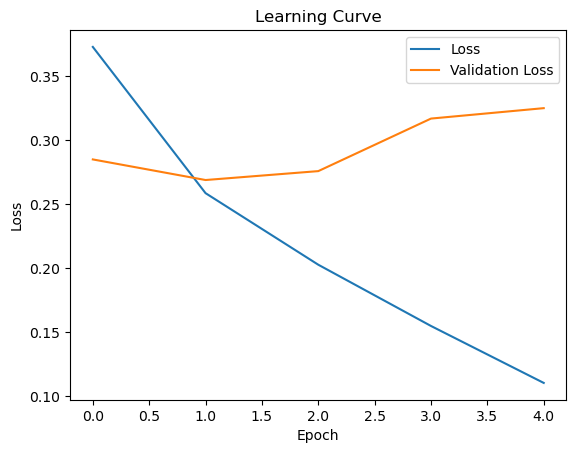

In [39]:
import matplotlib.pyplot as plt

# Load the loss and validation loss values.
loss = distillbert_learner.history.history["loss"]
val_loss = distillbert_learner.history.history["val_loss"]

# Create a figure and axes object.
fig, ax = plt.subplots()

# Plot the loss and validation loss values.
ax.plot(loss, label='Loss')
ax.plot(val_loss, label='Validation Loss')

# Set the labels and title of the plot.
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Learning Curve')

# Add a legend to the plot.
ax.legend()

# Show the plot.
plt.show()

In [40]:
distillbert_learner.validate(class_names=distillbert_transformer.get_classes())

25/25 [==============================] - 12s 226ms/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       600
           1       0.75      0.78      0.76       185

    accuracy                           0.89       785
   macro avg       0.84      0.85      0.84       785
weighted avg       0.89      0.89      0.89       785



array([[552,  48],
       [ 41, 144]])

In [41]:
distillbert_learner.model.summary()

Model: "tf_distil_bert_for_sequence_classification_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_79 (Dropout)        multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
distillbert_predictor = ktrain.get_predictor(distillbert_learner.model, preproc=distillbert_transformer)

In [43]:
distillbert_test_data = test_df['sentence'].tolist()
distillbert_test_label = test_df['label'].tolist()

In [44]:
y_pred_distillbert = distillbert_predictor.predict(distillbert_test_data)

In [45]:
y_pred_distillbert = [int(x) for x in y_pred_distillbert]

In [46]:
tn, fp, fn, tp = confusion_matrix(distillbert_test_label, y_pred_distillbert).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))

True Negative: 617, False Positive: 49, False Negative: 49, True Positive: 157


In [47]:
print('  Classification Report:\n',classification_report(distillbert_test_label,y_pred_distillbert),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       666
           1       0.76      0.76      0.76       206

    accuracy                           0.89       872
   macro avg       0.84      0.84      0.84       872
weighted avg       0.89      0.89      0.89       872
 



In [48]:
#distillbert_predictor.save('./model/distilbert_base_uncased_model') # 256 MB

In [49]:
print("AUC roc score for distillbert model: ", roc_auc_score(distillbert_test_label,y_pred_distillbert))

AUC roc score for distillbert model:  0.8442811743782617


In [35]:
distillbert_test_data

['the reason i am here is because of my major.',
 'i am extremely grateful that i have an education because not many have this opportunity.',
 'in general i am here because i want to be here.',
 'specifically speakers, im here today in this sci class because i need help with calculating valence electrons,atomic orbitals, and electron configuration.',
 'why am i currently sitting in this chair in this classroom on this campus, and how did i come to be here?',
 'the reason for why my sister took responsibility for the care taking of my mother, instead of my father, was because my father was diagnosed with ptsd and was mentally abusive.',
 'i want to learn more about this beautiful planet and how it works.',
 'i am over 400 miles away from what i used to call home, away from all my family.',
 'basically, i am very interested in finishing my major in order to get a job in computer science, and i am interested in physics.',
 "now that's something scientists are still uncovering everyday and

In [37]:
test_df_copy = test_df.copy()

test_df_copy["y_pred"] = y_pred_distillbert
test_df_copy

,sentence,label,phrase,y_pred
2111,the reason i am here is because of my major.,0,['i hope that this class will give me a greate...,0
4198,i am extremely grateful that i have an educati...,0,['i am here to learn and improve my skills and...,0
4853,in general i am here because i want to be here.,0,['i want to attempt to learn and comprehend ph...,0
3359,"specifically speakers, im here today in this s...",0,['im at sfsu because i am pursuing a bachelors...,0
1255,why am i currently sitting in this chair in th...,0,"['a degree, towards eventually (hopefully, may...",0
...,...,...,...,...
7946,"for example, are there any parts in the globe ...",0,['i also wanted to learn about the sun and moo...,0
6191,"right now, i feel that place is a spacious apa...",1,"['i am here to grow.', 'i am here to learn not...",0
1316,through them i was able to learn from school b...,0,['i am here to take this physics class so i ca...,1
3892,"on a broader note, i think about why i am in c...",0,"['ever since i was a little girl, ive dreamed ...",0


In [38]:
test_df_copy.to_excel("aspirational_plus_batch_1_batch_2_error_analysis.xlsx")